# Proyecto final: Regresión logística o red neuronal simple de una neurona implementada desde cero para un problema de clasificación binaria. 

En clase vimos como dado un conjunto de datos podemos utilizar diferentes tipos de ajuste para crear una función que se ajuste a ellos y permita realizar predicciones y extrapolar. Uno de los métodos vistos en clase fue la regresión lineal. Con base en este y haciendo las correspondientes modificaciones se pretende crear un algoritmo que permita clasificar entre un conjunto de datos con dos clases, es decir, uno de los algoritmos que son la base del aprendizaje de máquina o machine learning. Este algoritmo es también conocido como el tipo de red neuronal más simple, la cual consta de una neurona y se cataloga como un clasificador lineal. 

Los temas del curso que vimos en clase y se utlizaran en el desarollo de este trabajo son: 

- Manejo de python básico, uso de diferentes tipos de librerias como numpy, graficación con matplotlib, creación y uso de funciones. 

- Uso de la libreria pandas para manejo de datos. 

- Algebra lineal, manejo de matrices y vectores, producto punto, multiplicación entre matrices, vectores, matriz transpuesta. 

- Vectorización y técnicas para evitar el uso de loops innecesarios. 

- Estadística, regresión lineal, minimización de funciones. 

- Generacion de números aleatorios mediante el modulo random de numpy. 

Adicional a esto también se realizará una implementación generalizada de un algoritmo visto en clase taller llamado descenso del gradiente, el cual se realizo como ejemplo para encontrar el mínimo de una función sencilla en una variable. En este caso el algoritmo se generalizara para casos más complejos y en casos de multiples variables. 

# Regresión logística: 

Como se describió anteriormente, el objetivo de este trabajo es clear un clasificador que dado un conjunto de datos o caracteristicas de entrada, las cuales denotaremos de ahora en adelante como $X$, predecir si la muestra en cuestión que posee esas caracteristica pertenece a una clase u otra, es decir, generar una predicción de que tan probable es que la muestra sea perteneciente a la clase 1 o a la clase 2. Esta predicción o probabilidad se denota con la letra $\hat{Y}$ visto de otro modo:

Dado un conjunto de caracteristicas $X$ se quiere determinar $\hat{Y} = P(Y=1|X)$. 

$X$ que será entonces conocido como el vector de caracteristicas de entrada y pertenece al espacio $R^{n_{x}}$ donde $n_{x}$ es el número total de características, es decir : 


\begin{equation}
X= 
\begin{bmatrix} 
x_{1}\\
x_{2}\\
.\\
.\\
.\\
x_{i}\\
.\\
.\\
.\\
x_{n_{x}}
\end{bmatrix}
\end{equation}

En donde $x_{i}$ representa la característica í-esima. 

Normalmente las clases durante el entrenamiento del algoritmo serán etiquetadas mediante un vector $Y$, el cual será un número entero que denota una etiqueta que representa a la clase. En este caso: 

\begin{equation}
Y \in \left\{0,1\right\}
\end{equation}


Otro aspecto a tener en cuenta, es que para entrenar nuestro algoritmo de clasificación se necesita primero un conjunto de datos el cual contenga muestras etiquetadas de ambas clases que queremos aprender a clasificar. Esto es, necesitamos una base de datos que contenga $X^{m}$ vectores de caracteristicas a los cuales se les asignan sus $Y^{m}$ etiquetas correspondientes. En este caso, m representa el número total de muestras en nuestro conjunto de datos. Esto se puede ver como: 

\begin{equation}
M = \left\{     (X^{1},Y^{1}), (X^{2},Y^{2}),..., (X^{i},Y^{i}),...,(X^{m},Y^{m})    \right\}
\end{equation}

Normalmente, una parte del conjunto de datos $M$ se usa para entrenar el algoritmo, $M_{train}$, y otra parte usualmente más pequeña del conjunto de datos se utiliza para chequear que el algoritmo si este haciendo bien su trabajo, esto es, para validar el modelo, $M_{val}$. 

Para poner un poco lo anterior en contexto vamos a poner un ejemplo. Si queremos clasificar entre diferentes muestras de perros y gatos, podemos tener un vector de caracteristicas $X$, donde $x_{1}$ sea el tipo de pelo del animal y $x_{2}$ sea la forma del rostro. En este caso tenemos dos características y nuestro vector $X$ será de dimensión $n_{x}=2$. A su vez podemos asignar la etiqueta 0 a las muestras que representan gatos y 1 a las muestras que representan perros. Supongamos ahora que tenemos una base de datos donde hay 1000 características correspondientemente etiquetas y queremos usar el 80% de los datos para entrenar y el 20% de los datos para test. En este caso, podemos resumir todo en la siguiente tabla: 



<table style="width:35%">
  <tr>
    <td>Clase 1: Gatos</td>
    <td> Etiqueta: 0</td> 
  </tr>
  <tr>
    <td>Clase 2: Perros</td>
    <td>Etiqueta : 1 </td> 
  </tr>
   <td>Característica 1 ($x_{1}$)</td>
    <td>Tipo de pelo </td> 
  <tr>
      </tr>
   <td>Característica 2 ($x_{2}$)</td>
    <td>Forma del rostro</td> 
  <tr>
    <td> $n_{x}$</td>
    <td>2</td> 
  </tr>    
  <tr>
    <td> $m$</td>
    <td>1000</td> 
  </tr>
  <tr>
    <td>$m_{train}$</td>
    <td>800</td> 
  </tr>
    <tr>
    <td>$m_{val}$</td>
    <td> 200</td> 
  </tr>
    
</table>

### De la regresión lineal a la regresión logística: 

Pudimos observar que de forma generar la ecuación para una regresión lineal puede escribirse como : 

\begin{equation}
\hat{Y} = w_{1}x_{1} + w_{2}x_{2} +...+ w_{n_{x}}x_{n_x} + b 
\end{equation}

O escrito de manera vectorial: 

\begin{equation}
\hat{Y} = W^{T}X + b
\end{equation}

Donde $W \in R^{n_{x}}$. W y b se conocen como los parametros del sistema y nuestro objetivo es encontrar el valor de estos parametros que hacen que la regresión se ajuste bien a los datos. Sin embargo, la ecuación de una regresión lineal tiene un problema en los problemas de clasificación. Si observamos, para diferentes muestras de entrada $X^{i}$, la regresión puede dar valores de $\hat{Y}$ en un rango de $\left\{-\infty,\infty\right\}$, mientras que nuestro objetivo es que este en el rango de las etiquetas, es decir, $\hat{Y} \in \left\{0,1\right\}$. Esto se soluciona aplicando la función logistica a la salida de la regresión lineal, es decir, nuestra predicción será ahora: 


\begin{equation}
\hat{Y} = \sigma(W^{T}X + b)
\end{equation}

En donde $\sigma$ representa la función logística. Esta función está descrita en el rango $\left\{0,1\right\}$. Su ecuación es:

\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}

Para evaluar mejor el comportamiento de la función, vamos a proceder a observar su gráfico. 

Text(0.5, 1.0, 'Función logística')

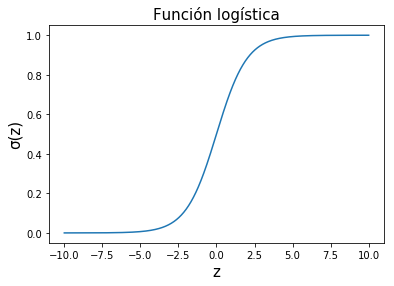

In [10]:
import numpy as np 
from matplotlib import pyplot as plt 

σ = lambda x: 1/(1+np.exp(-x)) # Definimos la función logística

z = np.linspace(-10,10,1000) # Creamos un espacio para graficar la función de -10 hasta 10 con 1000 puntos

# Gráficamos la función
plt.plot(z,σ(z)) 
plt.xlabel('z',size=15)
plt.ylabel('σ(z)',size=15)
plt.title('Función logística',size=15)

Veamos entonces que si $z = W^{T}X + b $ es un valor muy grande, $\sigma(z) \approx 1$. Por el contrario, si z es un valor muy pequeño $\sigma(z) \approx 0$. Para casos intermedios, lo que se tiene entonces es la probabilidad de que una muestra pertenezca a cierta clase. 


Tenemos entonces que nuestro objetivo es el mismo pero ahora aplicado a la regresión logística, dado un conjunto de caracteristicas $X^{i}$ queremos encontrar una predición que sea aproximada a la etiqueta, esto es, $\hat{Y} \approx Y $, y para esto queremos encontrar el conjunto de características $W$ y $b$ que hacen esto posible. 

Podemos resumir lo que hemos descrito hasta ahora en un grafo: 
<img src="img1.jpg">

### ¿Cómo se aprenden los parametros? 

##### Funciones de error

Para encontrar los parametros $W$ y $b$ utilizaremos lo que se conocen como funciones de error. En regresión logística se hará algo similar a lo que se hacía en el ajuste de curvas los parametros que ajustan un modelo. Esto es, vamos a evaluar que tanto difiere la predicción del algoritmo de la salida esperada o etiquetas en cuestión, es decir, calcularemos el error entre $Y$ y $\hat{Y}$ y modificaremos los parametros para que este error sea mínimo. Este error puede calcularse con varias funciones, en regresión lineal se realizaba mediante mínimos cuadrados: 

\begin{equation}
L(\hat{Y},Y) = \frac{1}{2} (\hat{Y} - Y)^{2}
\end{equation}

Sin embargo, existen otras funciones de error que pueden utilizarse. En este caso para la regresión logistica usaremos la que se conoce como entropía cruzada, la cual está dada mediante la formula: 

\begin{equation}
L(\hat{Y},Y) = - ( Y log\hat{Y} + (1-Y) log (1-\hat{Y}))
\end{equation}

Nuestro objetivo es entonces optimizar la función $L(\hat{Y},Y) $ para todas las muestras del conjuto de datos y para esto haremos uso del algoritmo del descenso del gradiente, pero primero, definiremos la función de error para multiples muestras de la base de datos, mejor conocida como función de costo. 

#### Funcion de costo o funcion de error a través de multiples muestras 

Nuestro objetivo es minimizar la función $L(\hat{Y},Y)$, sin embargo, esta error debe ser minimo en cada una de las muestras de la base de datos. Podemos entonces generalizar está función de error en lo que se conoce como función de costo, la cual está dada por: 

\begin{equation}
J(W,b) = \frac{1}{m} \sum_{i=1}^{m} L(\hat{Y}^{i},Y^{i})
\end{equation}

##### Descenso del gradiente

El descenso del gradiente es un algoritmo que nos permite optimizar o encontrar el mínimo de una función de forma iterativa. 
Se basa en dar pasos en la dirección de menor incremento, es decir, en la dirección negativa del gradiente. La siguiente imagen muestra un ejemplo de como sería esto en el caso de tener un solo parametro $W$:
<img src="img2.jpg">
Fuente de la imagen: [https://www.iartificial.net/]. 

De forma general, dada la función de error $L(\hat{Y},Y)$ y un conjunto de parametros $W = [w_{1},w_{2}, ..., w_{i},.., w_{n_{x}}] $, $b$ , el algoritmo del descenso del gradiente establece que : 

\begin{equation}
w_{i_{n+1}} = w_{i_{n}} - \alpha \frac{\partial L(\hat{Y},Y)}{\partial w_{i_{n}}} 
\end{equation}

para $i$ en $\left\{1,..,n_{x}\right\}$. 

\begin{equation}
b_{n+1} = b_{n} - \alpha \frac{\partial L(\hat{Y},Y)}{\partial b_{n}} 
\end{equation}

En donde $\alpha$ se conoce como el learning rate o tasa de aprendizaje y determina que tan rápido se actualizaran los parametros $W$ y b. Este parametro es demasiado importante ya que puede determinar que el aprendizaje sea o no exitoso.

#### Aplicación del descenso del gradiente a la regresión logística: 

Ya que sabemos como actualizar los pesos, lo ultimo que nos falta para empezar la programación del algoritmo es aplicar el descenso del gradiente a la regresión logistica. Para esto vamos a tener en cuenta la imagen que vimos anteriormente, agregando la función de costo: 
<img src="img3.jpg">

Lo primero que se hará será un proceso conocido como forward propagation, en el cual, una muestra $X^{i}$ es ingresada al modelo y se siguen todos los calculos mostrados en la imagen siguien la flecha naranja hasta obtener una predicción $\hat{Y}$. Una vez hecho esto se calcula el error y empieza un proceso conocido como back propagation para calcular el valor de $\frac{\partial L(\hat{Y},Y)}{\partial{w_{i}}}$. Para realizar esto lo que se hace es encontrar como varia el error si se introduce un cambio en el bloque inmediatamente anterior, siguiendo la linea azul, hasta llegar a $w_{i}$. Esto puede verse matemáticamente y usando la regla de la cadena como:  


\begin{equation}
\frac{\partial L(\hat{Y},Y)}{\partial{w_{i}}} = \frac{\partial L(\hat{Y},Y)}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial z} \frac{\partial z}{\partial w_{i}} 
\end{equation}

Ahora podemos computar cada término por separado y encontrar el resultado que deseamos para empezar a entrenar. 

Recordemos que 
\begin{equation}
L(\hat{Y},Y) = - ( Y log\hat{Y} + (1-Y) log (1-\hat{Y}))
\end{equation}

de donde:

\begin{equation}
\frac{\partial L(\hat{Y},Y)}{\partial \hat{Y}} = -\frac{Y}{\hat{Y}} + \frac{1-Y}{1 - \hat{Y}}
\end{equation}

siguiendo los calculos y reorganizando tenemos el producto del termino anterior con el siguiente termino como: 

\begin{equation}
\frac{\partial L(\hat{Y},Y)}{\partial \hat{Y}}  \frac{\partial \hat{Y}}{\partial z} = \hat{Y} - Y
\end{equation}

y finalmente 

\begin{equation}
\frac{\partial L(\hat{Y},Y)}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial z} \frac{\partial z}{\partial w_{i}} = \frac{\partial L(\hat{Y},Y)}{\partial{w_{i}}} = (\hat{Y} - Y) x_{i}
\end{equation}

### Implementación:

#### Base de datos: 

Ahora vamos a comenzar con la implementación. Para nuestra clasificación binaria primero necesitamos un conjunto de datos y para esto usaremos la libreria sklearn la cual nos permite generar un conjunto de muestras para clasificación. Tendremos como total 10000 muestras, divididas en 2 clases y 2 caracteristicas de modo que podamos visualizarlas en un plano. Posteriormente procederemos a reorganizar los datos usando pandas. A su vez usaremos el 80% de los datos para entrenamiento y el 20% de los datos para validación.

In [135]:
from sklearn import datasets # importamos sklearn para generar nuestro conjunto de datos
import pandas as pd # importamos pandas para organizar los datos 

data = datasets.make_classification(n_samples = 10000,n_features=2, n_redundant=0, n_classes=2) # Creamos nuestro dataset

In [136]:
# Organizamos nuestro dataset con Pandas
data = pd.DataFrame({'Feature 1': data[0][:,0], 'Feature 2': data[0][:,1], 'Label': data[1]}) 
data

,Feature 1,Feature 2,Label
0,1.321643,-0.397622,1
1,3.394830,0.224597,1
2,1.229618,1.001807,1
3,1.839721,0.840546,1
4,0.845862,-0.848766,1
...,...,...,...
9995,0.274931,-0.062733,0
9996,0.654873,1.105308,1
9997,0.967323,-1.021770,1
9998,-0.721808,-0.727403,0


Vamos a graficar los datos  para conocer su distribución 

In [137]:
def plot_database(data):  
    """
    Grafica las características de la base de datos

    Argumentos: 
    data -- Una base de datos en formato de pandas dataframe.

    """
    m=data.shape[0] 
    Clase1_val = data[data.Label == 0]
    Clase2_val = data[data.Label == 1]

    plt.plot(Clase1['Feature 1'],Clase1['Feature 2'], '.c', markersize = 3, label='Clase 1')
    plt.plot(Clase2['Feature 1'],Clase2['Feature 2'], '.y', markersize = 3, label = 'Clase 2')
    plt.legend(prop={'size': 10})
    plt.title('Base de datos:  $m = {}$'.format(m), size=15)
    plt.xlabel('Feature 1',size=15)
    plt.ylabel('Feature 2',size=15)

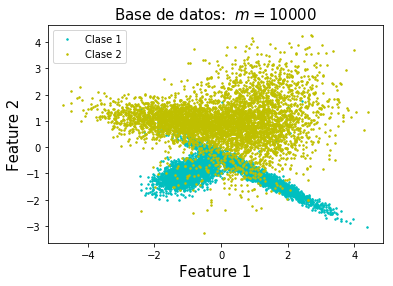

In [426]:
plot_database(data) # Para las muestras de entrenamiento

Ahora dividiremos nuestra base de datos en 80% para entrenamiento y 20% para validación. No es necesario hacer una mezcla de los datos ya que esto lo hace sklearn por defecto. 

In [429]:
data_train = data[0:8000]
data_val = data[8000:]

#### Implementación del algoritmo 

Ahora empezaremos con la implementación del algoritmo. Como mencionamos antes, la idea es implementar el algoritmo haciendo uso de la menor cantidad de ciclos for o loops, con el fin de optimizar la mayor cantidad de tiempo posible. Por esto haremos uso de la vectorización del código. Para esto haremos uso de todo lo aprendido mediante algebra lineal. 

Veamos que si tenemos m número de muestras en nuestra base de datos, podemos crear una matriz, $\bar{X}$ cuyas columnas sean cada una de las muestras de entrenamiento: 

\begin{equation}
\bar{X} = [ X^{1}, X^{2},...,X^{i},...X^{m}]
\end{equation}

De este modo $\bar{X} \in R^{n_x,m}$ y las ecuaciones descritas anteriormente toman la forma: 

\begin{equation}
\hat{y} = W^{T}\bar{X} + b
\end{equation}



Siguiendo con la implementación, la primera parte será crear una función que inicialice los valores de $W$ y de b. Queremos entrenar y encontrar su valor optimo pero para esto debemos darles cualquier valor inicial, y para esto, haremos uso de la generación de números aleatorios. 

In [171]:
def init_params(dimension):
    """
    Esta función inicializa los pesos para W y b usando valores aleatorios 
    
    Argumentos:
    dim -- Tamaño del vector W que queremos. Es decir, el número de parametros que tendrá nuestro modelo. En este caso es 2. 
    
    Returns:
    w -- vector con los parametros w iniciales de tamaño:  (dimension, 1)
    b -- número de punto flotante con el parametro inicial b 
    """
    
    W = np.random.randn(dimension,1) * 0.01
    b = np.random.randn() * 0.01
    
    return W,b

A su vez definiremos las funciones que utilizaremos más adelante, tales como la función sigmoide y la función de costo, definidas anteriormente 

In [172]:
def σ(z):
    """
    Retorna la función sigmoide aplicada a z

    Argumentos:
    z -- Un número de punto flotante o arreglo de numpy

    Returns:
    s -- σ(z)
    """
    
    σ = 1/(1+np.exp(-z))
    
    return σ

In [173]:
def cross_entropy(y_hat,y):
    """
    Computa la entropía cruzada media entre y_hat,y. 

    Argumentos:
    y_hat -- Un vector con las m predicciones luego del foward propagation. Shape = (1,m) 
    y -- Un Vector con una de las m etiquetas o salidas esperadas. Shape = (1,m)

    Returns:
    J -- Número de punto flotante con el promedio de la entropía cruzada para m número de muestras. 
    """

    J = np.mean(-(y* np.log(y_hat) + (1-y) * np.log(1-y_hat)))
    return J


Ahora procederemos a implementar el foward propagation y el back propagation: 

In [251]:
def forward_back_propagation(X,Y,W,b):
    """
    Realiza la propagación hacia adelante y la propagación hacia atrás para calcular los gradientes de la función error
    respecto a los parametros. 

    Argumentos:
    X -- Una matriz con todas las muestras de entrenamiento. Dimensiones = (nx,m)
    Y -- Un Vector con una de las m etiquetas o salidas correspondientes a cada muestra de entrenamiento m. Dimensiones = (1,m)
    W -- Un vector que contiene cada uno de los parametros asociados a las caracteristicas de entrada. Dimensiones (nx,1)
    b -- Un escalar con el parametro b. 

    Returns:
    dW -- Vector que contiene los gradientes respetivos asociados a los parametros W. Dimensión = (1,nx)
    db -- Escalar con el gradiente correspondiente al parametro b. 
    J  -- Entropia cruzada media o error medio de los datos. Número de punto flotante  
    """

    # Forward propagation 
    
    m = np.shape(X)[1]
    z = np.dot(W.T,X) + b # Se realiza el respectivo cálculo de z. 
    Y_hat = σ(z) # Se aplica la función sigmoide a z y se obtiene el vector de (1,m) predicciones. 
    J = cross_entropy(Y_hat, Y) # Se obtiene el error promedio con la función de costo de la entropia cruzada.  

    # Back propagation 

    dW = (1/m) * np.dot((Y_hat-Y),X.T) # Computamos los gradientes para W
    db = np.mean(Y_hat - Y) # Computamos el gradiente para b

    
    return dW, db, J
    
    

Ahora creemos una función para actualizar los pesos con base en el algoritmo del descenso del gradiente. 

In [306]:
def gradient_descent(W,b,dW,db,α): 
    """
    Actualiza los parametros W,b con base en sus respectivos gradientes. 

    Argumentos:
    W -- Vector con los parametros actuales W. Dimensión = (nx,1)
    b -- Escalar con el parametro actual b.
    dW -- Un vector que contiene cada uno de los gradientes para los parametros W. Dimensiones (1,nx)
    db -- Un escalar con el gradiente para el parametro b. 
    α -- Número de punto flotante. Learning rate o tasa de aprendizaje. 
    
    Returns:
    W --  Vector con los nuevos parametros W actualizados. Dimensión = (nx,1)
    b --  Escalar con el parametro actualizado b.
    
    """
    
    W = W - α*dW.T
    b = b - α*db
    
    return W,b
    

Ahora ya podemos realizar el entrenamiento del modelo logístico. Para esto integraremos todas las funciones que hemos definido hasta ahora y definiremos ciertos parametros adicionales como son el número de epocas. Una epoca se considera completada cuando el modelo ya entreno con todos los datos de entrenamiento. Se realizan diferente número de epocas para que el módelo pueda aprender bien los parametros. 

In [273]:
def train(X, Y, Epocas=100, α=0.005):
    '''
    Esta función se documenta más adelante con unas respectivas modificaciones.
    
    '''
    
    dimension = X.shape[0] # Calculamos el número de parametros dependiendo del número de caracteristicas de entrada.
    W,b = init_params(dimension) # Inicializamos los valores de W y b de forma aleatoria. 
    
    
    J_vector = [] # Creamos un vector para almacenar la función de costo durante cada epoca del entrenamiento
    
    # Entrenamos actualizando los parametros el número de epocas definidas
    for i in range(Epocas):
        
        dW,db,J = forward_back_propagation(X,Y,W,b) # Calculamos los gradientes mediante forward y back propagation
        W,b = gradient_descent(W,b,dW,db,α) # Actualizamos los parametros 
        J_vector.append(J) # Añadimos la función de costo al vector
        
    return W,b,J_vector 

Ahora ya tenemos listo nuestro modelo. Finalmente vamos a crear un par de funciones extra para medir el desempeño que está teniendo el algoritmo y para realizar los gráficos de la función de costo, la exactitud en la clasificación para las muestras de entrenamiento y validación, y para graficar que cantidad de datos están siendo bien y mal clasificados. Para calcular la exactitud en las predicciones se utiliza la formula: 

\begin{equation}
\epsilon = 1 - \frac{1}{m} \sum_{i=1}^{m} |\hat{Y} - Y|
\end{equation}

In [326]:
def predicciones(W,b,X): 
    
    """
    Predice a que clase pertenece un conjunto de muestras X. 

    Argumentos:
    W -- Vector con los parametros W del modelo. 
    b -- Número de punto flotante con el parametro b.
    X -- Matriz con un número determinado de muestras de entrenamiento o validación. 
    
    Returns:
    
    P -- Vector que contiene las predicciones (0-1) para cada una de las muestras ingresadas
        
    """
    m = X.shape[1] # Se obtiene el número de muestras para crear un vector y almacenar las predicciones.
    P = np.zeros((1, m)) # Se crea el vector que almacena las correspondientes predicciones.
    
    z = np.dot(W.T,X) + b # Se realiza el respectivo cálculo de z. 
    Y_hat = σ(z) # Se aplica la función sigmoide a z y se obtiene el vector de (1,m) predicciones(estás aún son probabilidades) 
    
    # Se almacenan todas las predicciones en el vector de predicciones
    for i in range(m):        
        if Y_hat[0,i] > 0.5:
            P[0,i] = 1
        else:
            P[0,i] = 0
            
    return P
    
def exactitud(y_hat,y):
    
    """
    Calcula la exactitud entre las predicciones y etiquetas

    Argumentos:
    y_hat -- vector de m predicciones.
    y --vector de m etiquetas.
    
    returns
    e -- Exactitud media
    """
    
    e = 1 -  np.mean(np.abs(y_hat - y))
    
    return e
    

def plot_desempeño(costo,ex_train,ex_val,epocas):
    
    """
    Gráfica el desempeño del algoritmo en cada epoca. 

    Argumentos:
    costo -- Vector con la función de costo durante cada epoca.
    ex_train -- Vector con la exactitud en los datos de entrenamiento computados durante cada epoca. 
    ex_val -- Vector con la exactitud en los datos de validación computados durante cada epoca.
    epocas -- Número de epocas que se entrenó el modelo. 
    """
    
    t = np.linspace(1,epocas,epocas)
    figure,axs=plt.subplots(1,3, figsize= (20,5))
    axs[0].plot(t,costo,'b')
    axs[0].set_title('Función de costo vs número de epocas', size=15)
    axs[0].set_xlabel('Epocas',size=15)
    axs[0].set_ylabel('Función de costo (J)',size=15)

    
    axs[1].plot(t,ex_train,'r')
    axs[1].set_title('Exactitud en entrenamiento vs número de epocas', size=15)
    axs[1].set_xlabel('Epocas',size=15)
    axs[1].set_ylabel('Exactitud - Entrenamiento',size=15)
    
    axs[2].plot(t,ex_val,'c')
    axs[2].set_title('Exactitud en validación vs número de epocas', size=15)
    axs[2].set_xlabel('Epocas',size=15)
    axs[2].set_ylabel('Exactitud - Validación',size=15)




In [430]:
def train(X_train, Y_train, X_val,Y_val, Epocas=100, α=0.005):

    """
    Está función entrena y gráfica los resultados tras el entrenamiento para el modelo de regresión logística o red neuronal 
    simple de una neurona.

    Argumentos:
    X_train -- Una matriz con todas las muestras de entrenamiento. Dimensiones = (nx,m)
    Y_train -- Un Vector con una de las m etiquetas correspondientes a cada muestra de entrenamiento m. Dimensiones = (1,m)
    X_val -- Una matriz con todas las muestras de validación. Dimensiones = (nx,m_val)
    Y_val -- Un Vector con una de las m etiquetas correspondientes a cada muestra de validación m. Dimensiones = (1,m_val)
    Epocas -- Número de epócas o iteraciones durante las cuales se entrenará el modelo. 
    α -- Learning rate o tasa de aprendizaje del modelo. 
    """
    
    dimension = X_train.shape[0] # Calculamos el número de parametros dependiendo del número de caracteristicas de entrada.
    W,b = init_params(dimension) # Inicializamos los valores de W y b de forma aleatoria. 
    
    
    J_vector = [] # Creamos un vector para almacenar la función de costo durante cada epoca del entrenamiento
    E_train = [] # Creamos un vector para almacenar la exactitud en entrenamiento durante cada epoca del entrenamiento.
    E_val = [] #Creamos un vector para almacenar la exactitud de los datos de validación durante cada epoca.
    
    # Entrenamos actualizando los parametros el número de epocas definidas
    for i in range(Epocas):
        
        dW,db,J = forward_back_propagation(X_train,Y_train,W,b) # Calculamos los gradientes mediante forward y back propagation
        W,b = gradient_descent(W,b,dW,db,α) # Actualizamos los parametros 
        J_vector.append(J) # Añadimos la función de costo al vector
        
        p_train = predicciones(W,b,X_train) # Calculamos las predicciones en el set de entrenamiento
        p_val = predicciones(W,b,X_val) # Calculamos las predicciones en el set de validación
        
        e_train = exactitud(p_train,Y_train) # Calculamos la exactitud en el set de entrenamiento
        e_val = exactitud(p_val,Y_val) # Calculamos la exactitud en el set de validación
    
        E_train.append(e_train) # Añdimos las exactitudes a los vectores correspondientes. 
        E_val.append(e_val)
    
    plot_desempeño(J_vector,E_train,E_val,Epocas) # Una vez finaliza el entrenamiento, graficamos el desempeño de la red  
    
    
    # Imprimimos la exactitud en los datos de entrenamiento y en los datos de validación tras entrenar el modelo
    print('La exactitud en la clasificación para los datos de entrenamiento fue de {:.3f} %'.format(E_train[-1]*100))
    print('La exactitud en la clasificación para los datos de validación fue de {:.3f} %'.format(E_val[-1]*100))
    
    #
    return W,b

Finalmente tenemos listo nuestro modelo de regresión logistica. Ahora vamos a preparar los datos y correr un experimento. 

La exactitud en la clasificación para los datos de entrenamiento fue de 83.438 %
La exactitud en la clasificación para los datos de validación fue de 82.200 %


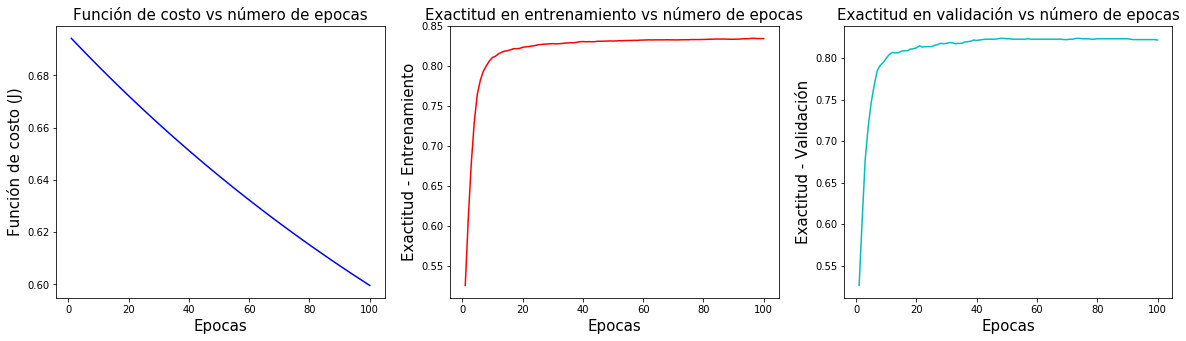

In [431]:

# Preparamos los datos que serán ingresados para entrenar y chequear el modelo: 
X_train = data_train.to_numpy()
Y_train = X_train[:,-1]
X_train = X_train[:,:-1].T
Y_train.resize(1,Y_train.shape[0])

X_val = data_val.to_numpy()
Y_val = X_val[:,-1]
X_val = X_val[:,:-1].T
Y_val.resize(1,Y_val.shape[0])


# Entrenamos el modelo durante 100 epocas con un learning rate de 0.005
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=100)

# Resultados y conclusiones 

En este trabajo se logra implementar un modelo de regresión logística desde 0, el cual es usado para realizar una clasificación binaria entre dos clases. Se logra obtener una exactitud mayor al 80% tanto para los datos de entrenamiento como para los datos de validación. 

Hay algunas consideraciones interesantes que hacer respecto al modelo. Observamos por ejemplo que el modelo aprende a minimizar la función de costo conforme pasan las épocas, lo cual era lo esperado ya que se entreno precisamente para esto usando el algoritmo de descenso del gradiente. A su vez, podemos observar que el modelo va aprendiendo a realizar cada vez mejor la clasificación conforme pasan las epocas y esto se ve reflejado en la exactitud no solo de entrenamiento sino también de validación. 

La exactitud de validación es menor a la exactitud de entrenamiento y esto era de esperarse ya que la red ya ha visto los datos de entrenamiento por lo tanto sabe clasificarlos mejor, sin embargo, la red nunca ve los datos de validación durante su entrenamiento. Sin embargo, esta diferencia no es tan sifnificativa y esto se debe a que la base de datos tiene una distribución muy similar tanto en entrenamiento como en validación. En algunas ocasiones cuando la exactitud de entrenamiento es muy superior a la exactitud de validación se dice que el modelo se está sobreajustando y en realidad no está aprendiendo a generalizar la diferencia entre las dos clases, ya que solo funciona bien en el conjunto de datos de entrenamiento. 

También se observa que durante el entrenamiento la exactitud llega a un limite superior y al parecer no sube más. Si queremos mejorar el modelo de modo que aprenda a realizar mejor la tarea, es decir, tenga una exactitud más alta hay dos posibilidades. La primera es modificar los parametros del número de epocas y de la tasa de aprendizaje ya que estos influyen directamente en el aprendizaje del modelo, ya siendo que este sea mejor o peor. A continuación realizaremos distintas pruebas para observar como afecta la modificación de estos parametros. La segunda opción es crear un modelo que sea mucho más robusto porque como se mencionó antes, la regresión logística es un clasificador lineal, y si bien puede ser útil en muchas aplicaciones, también hay un limite en los tipos de datos que puede aprender a clasificar y esto depende intrisecamente de su distribución. 

### Variación en el número de epocas 

La exactitud en la clasificación para los datos de entrenamiento fue de 59.662 %
La exactitud en la clasificación para los datos de validación fue de 58.750 %


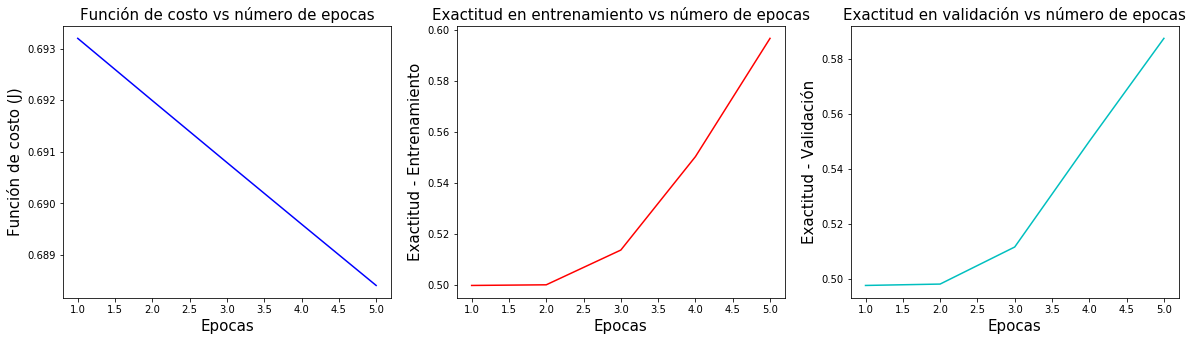

In [366]:
# Con 5 epocas de entrenamiento
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=5)

La exactitud en la clasificación para los datos de entrenamiento fue de 77.612 %
La exactitud en la clasificación para los datos de validación fue de 76.650 %


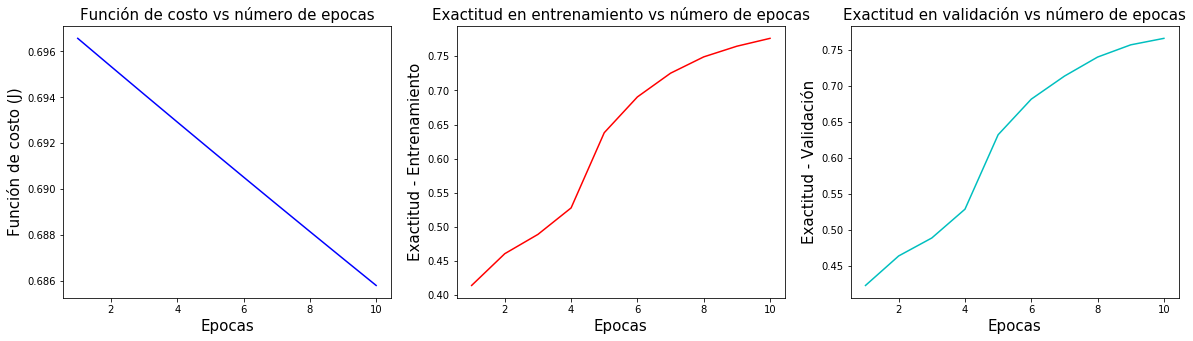

In [372]:
# Con 10 epocas de entrenamiento
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=10)

Si reducimos el número de epocas o iteraciones a una cantidad muy baja, el modelo no habrá visto los datos la suficiente cantidad de veces para hacer una buena predicción. Esto se ve reflejado en la exactitud la cual es mucho peor en este caso. 

La exactitud en la clasificación para los datos de entrenamiento fue de 83.875 %
La exactitud en la clasificación para los datos de validación fue de 82.850 %


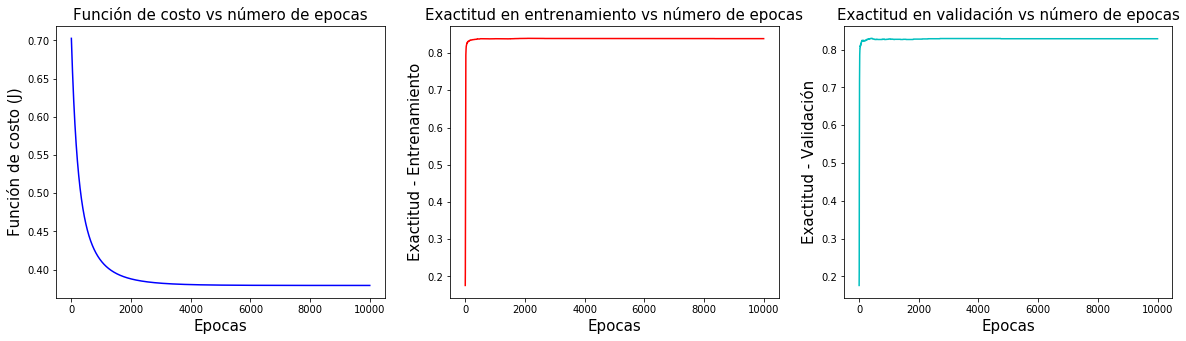

In [352]:
# Con 10000 epocas de entrenamiento
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=10000)

Sin embargo, aumentar considerablemente el número de epocas no quiere decir que el modelo vaya a aprender, a pesar de que se vea una reducción en la función de costo, porque como mencionamos anteriormente, el modelo alcanza un limite superior de aprendizaje. 

### Variación en la tasa de aprendizaje 

La exactitud en la clasificación para los datos de entrenamiento fue de 76.850 %
La exactitud en la clasificación para los datos de validación fue de 76.150 %


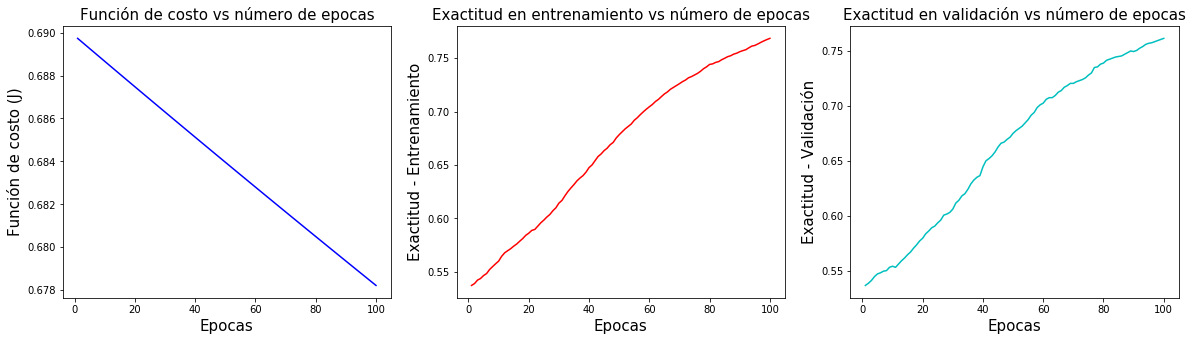

In [385]:
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=100, α= 0.0005)

Si el valor de tasa de aprendizaje es demasiado bajo, el modelo tardara más en aprender y por tanto necesitara una cantidad mayor de epocas para lograr un buen desempeño. Sin embargo, esto hace que la actualizacion de los parametros W y b se de en saltos más pequeños y puede ayudar a que el modelo no se quede estancado en un mínimo local de la función de costo. 

La exactitud en la clasificación para los datos de entrenamiento fue de 83.812 %
La exactitud en la clasificación para los datos de validación fue de 82.800 %


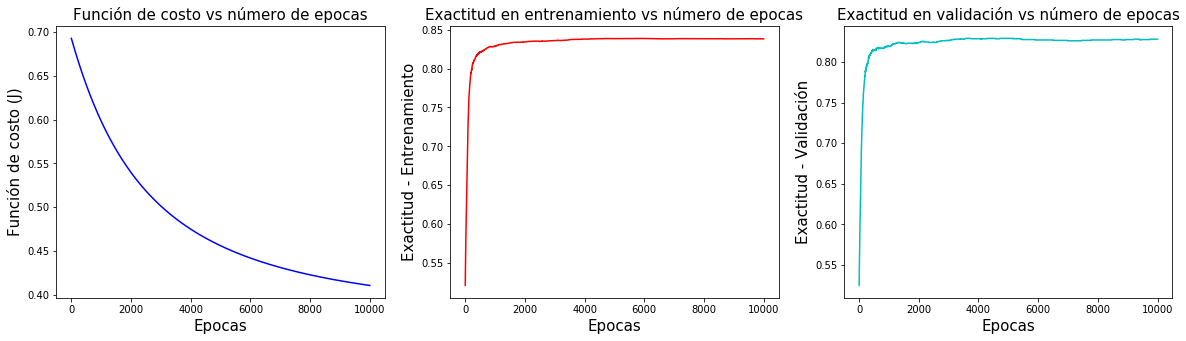

In [387]:
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=10000, α= 0.0005)

La exactitud en la clasificación para los datos de entrenamiento fue de 83.875 %
La exactitud en la clasificación para los datos de validación fue de 82.850 %


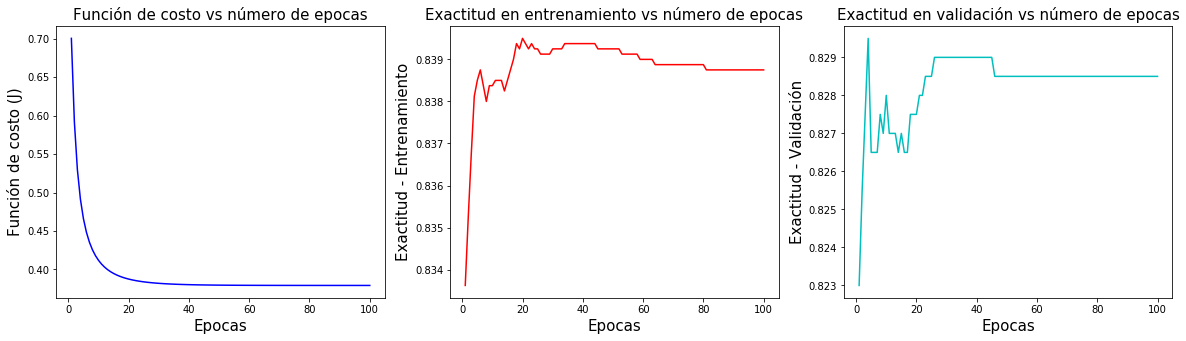

In [388]:
W,b = train(X_train,Y_train,X_val,Y_val,Epocas=100, α= 0.5)

Por el contrario, si el valor de la tasa de aprendizaje es muy alto, el modelo aprendera mucho más rapido, pero dara saltos mucho más grandes a la hora de actualizar los parametros W y b. Esto puede ocasionar que la red se estanque en un mínimo local de la función y a su vez, se observa una mayor variabilidad en las curvas de exatitud. 
Para finalizar, tenemos entonces que estos dos parametros son muy importantes en el aprendizaje de un modelo logístico y deberan ser elegidos con cuidado a la hora de entrenar un modelo desde cero. Sin embargo, en el aprendizaje de máquina o machine learning, es común relizar una busqueda exhaustiva de estos parametros corriendo en diversas ocasiones los experimentos para determinar que parametros hacen que el modelo tenga un mejor desempeño.